### recovery positive LDA

#### positive 
- 별점 4,5

In [1]:
import pandas as pd

In [2]:
df_recovery_positive = pd.read_csv('./recovery_positive.csv')

In [3]:
from gensim.corpora import Dictionary

In [4]:
type(df_recovery_positive['replaced_review'])

pandas.core.series.Series

In [5]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_recovery_positive['replaced_review'] = df_recovery_positive['replaced_review'].astype(str)

In [6]:
positive_review = df_recovery_positive['replaced_review'].apply(lambda x: x.split()).values

In [7]:
positive_review

array([list(['좋다', '피곤하다', '사라지다', '삼키다']),
       list(['복용', '한지', '피로', '회복', '증강', '좋다']),
       list(['함량', '높다', '품질', '좋다', '제품', '믿다', '구매', '항상', '체력', '굉장하다', '힘들다', '한약', '먹어주다', '체력', '도움', '부원', '원하다', '성분', '부원', '신경', '써다', '품질', '좋다', '넘다']),
       ..., list(['빨르다', '뛰어나다']), list(['지인', '선물', '좋아하다']),
       list(['뛰어나다'])], dtype=object)

In [8]:
dictionary = Dictionary(positive_review)
dictionary

In [9]:
dictionary.doc2bow(positive_review[3])

[(2, 4),
 (10, 1),
 (12, 1),
 (17, 1),
 (25, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1)]

In [10]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in positive_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [11]:
df_recovery_positive['문장벡터화'] = corpus_list

##### 토픽 잡기


In [12]:
from gensim.models import LdaModel

In [13]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=7)

In [14]:
lda_model.print_topics(num_words=7)

[(0,
  '0.080*"비타민" + 0.024*"제품" + 0.020*"좋다" + 0.015*"섭취" + 0.014*"구매" + 0.011*"건강" + 0.010*"양제"'),
 (1,
  '0.022*"좋다" + 0.021*"피로" + 0.012*"회복" + 0.012*"구매" + 0.010*"복용" + 0.010*"도움" + 0.009*"양제"'),
 (2,
  '0.023*"좋다" + 0.020*"복용" + 0.014*"건강" + 0.013*"잔틴" + 0.013*"루테" + 0.011*"루테인" + 0.010*"피부"'),
 (3,
  '0.031*"건강" + 0.030*"좋다" + 0.018*"도움" + 0.014*"비타민" + 0.012*"제품" + 0.012*"구매" + 0.011*"성분"'),
 (4,
  '0.026*"섭취" + 0.018*"좋다" + 0.015*"도움" + 0.013*"복용" + 0.013*"밀크" + 0.011*"건강" + 0.010*"제품"'),
 (5,
  '0.094*"빨르다" + 0.073*"뛰어나다" + 0.058*"좋다" + 0.028*"가격" + 0.021*"제품" + 0.018*"구매" + 0.014*"꾸준하다"'),
 (6,
  '0.131*"좋다" + 0.069*"상태" + 0.062*"깔끔하다" + 0.028*"구매" + 0.015*"선물" + 0.014*"건강" + 0.014*"사다"')]

###### 최적 토픽 추출하기 

In [15]:
sentences = df_recovery_positive['replaced_review']
sentences

0                                         좋다 피곤하다 사라지다 삼키다
1                                        복용 한지 피로 회복 증강 좋다
2        함량 높다 품질 좋다 제품 믿다 구매 항상 체력 굉장하다 힘들다 한약 먹어주다 체력...
3        업무 강도 세다 인지 입맛 힘들다 구매 해주다 성분 좋다 함량 높다 괜찮다 알약 타...
4        코로나 확진 떨어지다 컨디션 쉬다 올라오다 블랙 마카 특화된 양제 기울다 사다 블랙...
                               ...                        
20165              빨르다 뛰어나다 아르기닌 함량 높다 래서 피로 회복 생기다 상큼 스타일
20166                                             빨르다 뛰어나다
20167                                             빨르다 뛰어나다
20168                                           지인 선물 좋아하다
20169                                                 뛰어나다
Name: replaced_review, Length: 20170, dtype: object

In [16]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [17]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['좋다', '피곤하다', '사라지다', '삼키다'],
 ['복용', '한지', '피로', '회복', '증강', '좋다'],
 ['함량',
  '높다',
  '품질',
  '좋다',
  '제품',
  '믿다',
  '구매',
  '항상',
  '체력',
  '굉장하다',
  '힘들다',
  '한약',
  '먹어주다',
  '체력',
  '도움',
  '부원',
  '원하다',
  '성분',
  '부원',
  '신경',
  '써다',
  '품질',
  '좋다',
  '넘다'],
 ['업무',
  '강도',
  '세다',
  '인지',
  '입맛',
  '힘들다',
  '구매',
  '해주다',
  '성분',
  '좋다',
  '함량',
  '높다',
  '괜찮다',
  '알약',
  '타입',
  '먹기',
  '좋다',
  '크기',
  '크다',
  '넘김',
  '좋다',
  '꾸준하다',
  '으쌰으쌰',
  '좋다'],
 ['코로나',
  '확진',
  '떨어지다',
  '컨디션',
  '쉬다',
  '올라오다',
  '블랙',
  '마카',
  '특화된',
  '양제',
  '기울다',
  '사다',
  '블랙',
  '마카',
  '성분',
  '흑마',
  '아르기닌',
  '관문',
  '좋다',
  '그렇다',
  '기운'],
 ['더워지다',
  '기력',
  '없어지다',
  '남편',
  '위해',
  '구매',
  '캡슐',
  '타입',
  '먹기',
  '편하다',
  '신랑',
  '복용',
  '중이',
  '좋다',
  '아르기닌',
  '흑마',
  '마카',
  '좋다',
  '성분',
  '다양하다',
  '힘내다',
  '좋다'],
 ['가격', '저렴하다', '넘다', '탄복', '여기저기', '선물'],
 ['운전',
  '남편',
  '피곤하다',
  '주문',
  '회사',
  '블랙',
  '마카',
  '피로',
  '덜하다',
  '첨가',
  '많다',
  '회사',
  '주문',
  '해보다',
  '괜

In [18]:
preprocessed_sentences = morphs_list

In [19]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [20]:
from gensim.models.coherencemodel import CoherenceModel

In [21]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [22]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.312577,-7.274822
1,0.377942,-7.232578
2,0.385168,-7.214563
3,0.383089,-7.218104
4,0.392838,-7.260870
5,0.371630,-7.281947
6,0.371191,-7.299230
7,0.416776,-7.323774
8,0.390481,-7.416443


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

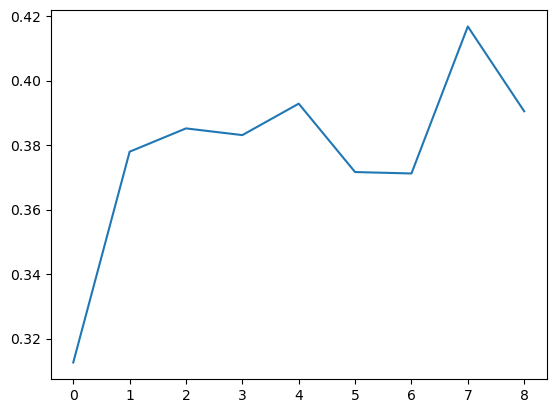

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

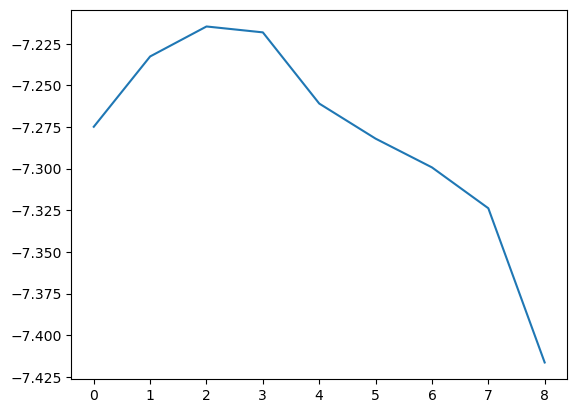

In [24]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [25]:
# %pip install --user pyLDAvis

In [26]:
# !pip install gensim

In [27]:
# !pip show pyLDAvis

In [28]:
import pyLDAvis.gensim_models

In [63]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [64]:
lda_model.print_topics(num_words=4)

[(0, '0.066*"빨르다" + 0.065*"좋다" + 0.052*"뛰어나다" + 0.021*"가격"'),
 (1, '0.033*"좋다" + 0.015*"복용" + 0.008*"상태" + 0.008*"구매"'),
 (2, '0.053*"비타민" + 0.031*"좋다" + 0.017*"제품" + 0.015*"피로"')]

In [65]:
positive_topic=lda_model.print_topics(num_words=4)

In [66]:
type(positive_topic)

list

In [67]:
df_positive_topic=pd.DataFrame(data=positive_topic)

In [68]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [69]:
pyLDAvis.display(result_visualized)

In [70]:
df_positive_topic.to_excel('./recovery_positive_topic.xlsx')

In [71]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './recovery_review_positive_result_visualized.html')